<a href="https://colab.research.google.com/github/pinkdolphin11/ESAA/blob/main/5_9_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Chap 4. 분류**

**01. 분류(Classification)의 개요**

지도학습 : 레이블(Label), 즉 명시적인 정답이 있는 데이터가 주어진 상태에서 학습하는 머신러닝 방식

분류 : 지도학습의 대표적인 유형으로, 학습 데이터로 주어진 데이터의 피처와 레이블값(결정 값, 클래스 값)을 머신러닝 알고리즘으로 학습해 모델을 생성하고, 생성된 모델에 새로운 데이터 값이 주어졌을 때 미지의 레이블 값을 예측

분류 구현 머신러닝 알고리즘
* 베이즈(Bayes) 통계와 생성 모델에 기반한 나이브 베이즈(Naive Bayes)
* 독립변수와 종속변수의 선형 관계성에 기반한 로지스틱 회귀(Logistic Regression)
* 데이터 균일도에 따른 규칙 기반의 결정 트리(Decision Tree)
* 개별 클래스 간의 최대 분류 마진을 효과적으로 찾아주는 서포트 벡터 머신(Support Vector Machine)
*  근접 거리를 기준으로 하는 최소 근점(Nearest Neighbor) 알고리즘
* 심층 연결 기반의 신경망(Neural Network)
* 서로 다른(또는 같은) 머신러닝 알고리즘을 결합한 앙상블(Ensemble)

**앙상블 방법(Ensemble Method)**

이미지, 영상, 음성, NLP 영역에서 신경망에 기반한 딥러닝이 머신러닝계를 선도하고 있지만, 이를 제외한 정형 데이터의 예측 분석 영역에서는 앙상블이 매우 높은 예측 성능으로 인해 애용되고 있다.

* 배깅(Bagging) 방식
  * 랜덤 포레스트(Random Forest)
* 부스팅(Boosting) 방식
  * 그래디언트 부스팅(Gradient Boosting)

XgBoost와 LightBGM 등 기존 그래디언트 부스팅의 예측 성능을 한 단계 발전시키면서도 수행 시간을 단축시킨 알고리즘이 계속 등장하면서 근래에는 부스팅 방식이 지속해서 발전하고 있다.

앙상블은 대부분 서로 동일한 알고리즘을 결합하며, 앙상블의 기본 알고리즘으로는 일반적으로 결정 트리가 사용된다. 결정 트리는 적용이 매우 쉽고 데이터 사전 가공의 영향이 매우 적지만, 예측 성능을 향상시키기 위해 복잡한 규칙 구조를 가져야 해서 과적합(overfitting)이 발생해 반대로 예측 성능이 저하될 수도 있다. 하지만 앙상블 기법은 여러 개의 약한 학습기(예측 성능이 떨어지는 알고리즘)를 결합해 확률적 보완과 오류가 발생한 부분에 대한 가중치를 계속 업데이트하면서 예측 성능을 향상시키기 때문에 이러한 단점이 오히려 장점으로 작용한다.

**02. 결정 트리**

결정 트리(Decision Tree) : 데이터에 있는 규칙을 학습을 통해 자동으로 찾아내 트리 기반의 분류 규칙을 만드는 것이다. 규칙은 if/else 기반으로 나타내는 것이 가장 쉽기 때문에 데이터의 어떤 기준을 바탕으로 규칙을 만들어야 가장 효율적인 분류가 될 것인지 결정하는 것이 중요하다.

<결정 트리의 구조>

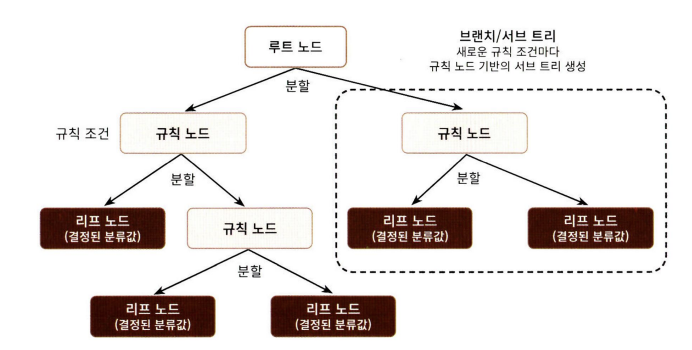

규칙 노드(Decision Node) : 규칙 조건

리프 노드(Leaf Node) : 결정된 클래스 값

새로운 규칙 조건마다 서브 트리(Sub Tree) 생성

데이터 세트에 있는 피처가 결합해 규칙 조건을 만들 때마다 규칙 노드 생성

규칙이 많을수록 과적합으로 이어지기 쉽다. 트리의 깊이(depth)가 깊어질수록 결정 트리의 예측 성능이 저하될 가능성이 높다. 가능한 한 적은 결정 노드로 높은 예측 정확도를 가지려면 데이터를 분류할 때 최대한 많은 데이터 세트가 해당 분류에 속할 수 있도록 결정 규칙이 정해져야 한다. 따라사 최대한 균일한 데이터 세트를 구성할 수 있도록 트리를 분할(Split)해야 한다.

데이터 세트의 균일도는 데이터를 구분하는 데 필요한 정보의 양에 영향을 미친다. 검은 공만 들어있는 주머니에서 하나의 공을 뽑았을 때는 데이터에 대한 별다른 정보 없이도 검은 공이라고 예측할 수 있지만, 흰 공과 검은 공이 섞여 있는 주머니에서 공을 뽑으면 쉽게 검은 공이라고 단정할 수 없다. 균일도가 높을수록 같은 조건에서 데이터를 판단하는 데 있어 적은 정보가 필요하다.

결정 노드는 정보 균일도가 높은 데이터 셑를 먼저 선택할 수 있도록 규칙 조건을 만든다. 정보 균일도가 데이터 세트로 쪼개질 수 있도록 조건을 찾아 서브 데이터 세트를 만들고, 다시 이 서브 데이터 세트에서 균일도가 높은 자식 데이터 세트 쪼개는 방식을 자식 트리로 내려가면서 반복하여 데이터 값을 예측한다.

정보의 균일도 측정 방법
* 엔트로피를 이용한 정보 이득(Information Gain) 지수

  엔트로피 : 주어진 데이터 집합의 혼잡도. 같은 값이 섞여 있을수록 낮다.
  
  정보 이득 지수 = 1- 엔트로피
  
  결정 트리는 정보 이득이 높은 속성을 기준으로 분할
* 지니 계수
  불평등 지수. 0이 가장 평등하고 1로 갈수록 불평등.

  지니 계수가 낮을수록 데이터 균일도가 높다. 지니 계수가 낮은 속성을 기준으로 분할

  DecisionTreeClassifier는 지니 계수를 이용해 데이터 세트를 분할한다.

[결정 트리 모델의 특징]

균일도라는 규칙을 기반으로 하여 알고리즘이 쉽고 직관적이다. 가장 큰 단점은 과적합으로 정확도가 떨어지는 것이다. 결정 트리는 결과적으로 트리 깊이가 깊은 복잡한 학습 모델에 이를 수밖에 없어 실제 상황에 유연하게 대처할 수 없게 된다. 따라서 트리의 크기를 사전에 제한하는 것이 성능 튜닝에 더 도움이 된다.

[결정 트리 파라미터]

* min_samples_split : 노드를 분할하기 위한 최소한의 샘플 데이터 수, 과적합 제어에 사용, default = 2, 작을수록 분할되는 노드가 많아져서 과적합 가능성 증가
* min_samples_leaf : 말단 노드(leaf)가 되기 위한 최소한의 샘플 데이터 수, 과적합 제어 용도이지만 비대칭적 데이터의 경우 특정 클래스의 데이터가 극도로 작을 수 있어 작게 설정 필요
* max_features : 최적의 분할을 위해 고려할 최대 피처 개수, default = None(데이터 세트의 모든 피처를 사용해 분할), int 형으로 지정하면 대상 피처의 개수, float 형으로 지정하면 전체 피처 중 대상 피처의 퍼센트, sqrt(auto)는 전체 피처 개수의 제곱근만큼 선정, log는 전체 피처 중 log2개 선정
* max_depth : 트리의 최대 깊이 규정, default = None, 완벽하게 클래스 결정 값이 될 때까지 깊이를 계속 키우며 분할하거나 노드가 가지는 데이터 개수가 min_samples_split보다 작아질 때까지 계속 깊이 증가, 깊이가 깊어지면 min_samples_split 설정대로 최대 분할하여 과적합 할 수 있으므로 적절한 값으로 제어 필요
* max_leaf_nodes : 말단 노드(Leaf)의 최대 개수

[결정 트리 모델의 시각화]

결정 트리 알고리즘이 어떤 규칙을 가지고 트리를 생성하는지 Graphviz 패키지를 사용해 시각화 할 수 있다. 사이킷런의 export_graphviz()에 함수 인자로 학습이 완료된 Estimator, 피처의 이름 리스트, 레이블 이름 리스트를 입력하면 학습된 결정 트리 규칙을 실제 트리 형태로 시각화

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

#DecisionTree Classifier 생성
dt_clf=DecisionTreeClassifier(random_state=156)

#붓꽃 데이터 로딩, 학습과 테스트 데이터 세트로 분리
iris_data=load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=11)

#DecisionTreeClassifer 학습
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=156)

In [3]:
from sklearn.tree import export_graphviz

#export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일 생성
export_graphviz(dt_clf, out_file='tree.dot', class_names=iris_data.target_names, \
                feature_names = iris_data.feature_names, impurity= True, filled = True)

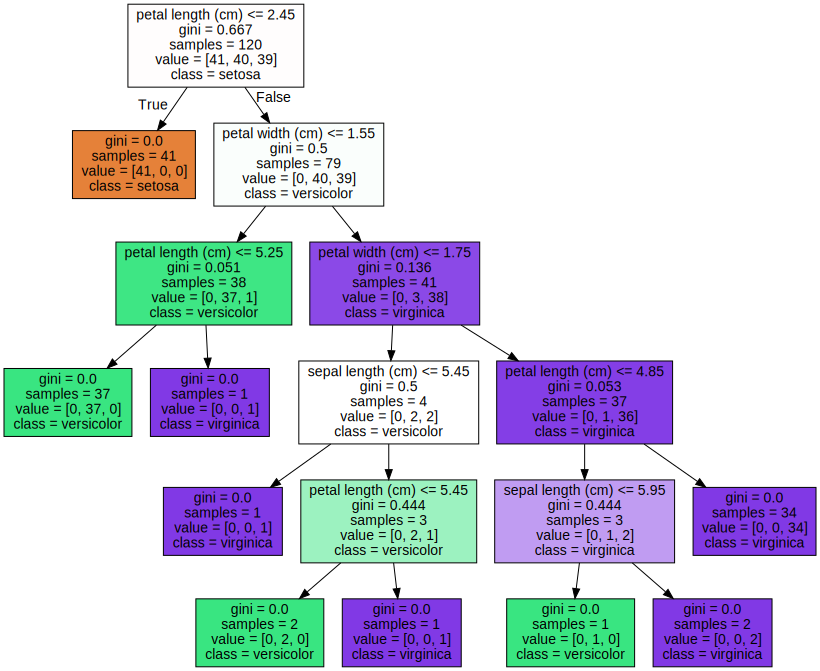

In [4]:
import graphviz
#tree.dot 파일을 Graphviz가 읽어서 시각화
with open('tree.dot') as f:
  dot_graph = f.read()
graphviz.Source(dot_graph)

리프 노드는 최종 클래스(레이블) 값이 결정되는 노드이다. 리프 노드가 되려면 오직 하나의 클래스 값으로 최종 데이터가 구성되거나 리프 노드가 될 수 있는 하이퍼 파라미터 조건을 충족해야 한다. 자식 노드가 있는 노드는 브랜치 노드이며 자식 노드를 만들기 위한 분할 규칙 조건을 갖고 있다.

위 그림에서 노드 내에 기술된 지표의 의미

* petal length(cm)<=2.45와 같이 피처의 조건이 있는 것은 자식 노드를 만들기 위한 규칙 조건. 이게 없으면 리프 노드

* gini는 다음의 value=[]로 주어진 데이터 분포에서의 지니 계수

* samples는 현 규칙에 해당하는 데이터 건수

* value = []는 클래스 값 기반의 데이터 건수. 붓꽃 데이터 세트는 클래스 값으로 0, 1, 2를 가지며 각각 setosa, versicolor, virginica 품종을 가리킨다.

1번 노드

* class = setosa : 하위 노드를 가질 경우 setosa의 개수가 41개로 가장 많다

2번 노드 : 모든 데이터가 Setosa로 결정, 클래스로 결정된 리프 노드, 지니 계수는 0

3번 노드 : Petal length<=2.45가 False인 규칙 노드

*** 이와 같은 과정을 반복하여 진행

각 노드의 색깔은 붓꽃 데이터의 레이블 값을 의미한다. 색갈이 짙어질수록 지니 계수가 낮고 해당 레이블에 속하는 샘플 데이터가 많다.

max_depth를 제한 없음에서 3개로 설정하면 트리 깊이가 줄어든다. min_samples_splits=4로 설정하면 맨 아래 리프 노드 중 사선 박스로 표시된 노드에서 샘플이 3개이고 서로 상이한 클래스 값이 있어도 더 이상 분할하지 않는다. min_samples_leaf 값을 키우면 더 이상 분할하지 않고 리프 노드가 될 수 있는 조거닝 완화된다.

결정 트리는 균일도에 기반해 어떤 속성을 규칙 조건으로 선택하느냐가 중요한 요건이다. 사이킷런은 결정 트리 알고리즘이 학습을 통해 규칙을 정하는 데 있어 피처의 중요한 역할 지표를 DecisionTreeClassifier 객체의 feature_importances_ 속성으로 제공한다.

feature_importance_ : ndarray 형태로 값 반환, 피처 순서대로 값 할당. 값이 높을수록 해당 피처의 중요도가 높다.

Feature importances:
[0.025 0.    0.555 0.42 ]
sepal length (cm) : 0.025
sepal width (cm) : 0.000
petal length (cm) : 0.555
petal width (cm) : 0.420


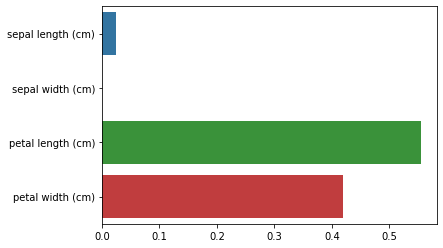

In [5]:
import seaborn as sns
import numpy as np
%matplotlib inline

#feature importance 추출
print('Feature importances:\n{0}'.format(np.round(dt_clf.feature_importances_,3)))

#feature별 importance 매핑
for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
  print('{0} : {1:.3f}'.format(name,value))

#feature importance를 column별로 시각화하기
sns.barplot(x=dt_clf.feature_importances_,y=iris_data.feature_names)

petal length의 피처 중요도가 가장 높다.

[결정 트리 과적합(Overfitting)]

make_classification() 함수를 이용해 2개의 피처가 3가지 유형의 클래스 값을 가지는 데이터 세트를 만들고 이를 그래프 형태로 시각화하자.

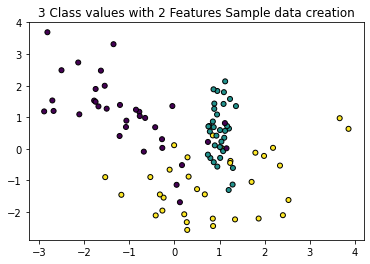

In [6]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title("3 Class values with 2 Features Sample data creation")

#2차원 시각화를 위해 피처 2개, 클래스 3가지 유형의 분류 데이터 샘플 생성
X_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2, n_classes=3, n_clusters_per_class=1, random_state=0)

#그래프 형태로 2개의 피처로 2차원 좌표 시각화, 각 클래스 값 다른 색깔로 표시
plt.scatter(X_features[:,0],X_features[:,1],marker='o',c=y_labels,s=25,edgecolor='k')

X_features와 y_labels 데이터 세트를 기반으로 결정 트리 학습


**03. 앙상블 학습**

[앙상블 학습 개요]

여러 개의 분류기(Classifier)를 생성하고 그 예측을 결합함으로써 보다 정확한 최종 예측을 도출하는 기법

* 랜덤 포레스트

* 그래디언트 부스팅 알고리즘

앙상블 학습의 유형

* 보팅(Voting) : 서로 다른 알고리즘을 가진 분류기 결합, 여러 개의 분류기가 투표를 통해 최종 예측 결과 결정

* 배깅(Bagging) : 각각의 분류기가 모두 같은 유형의 알고리즘 기반, 데이터 샘플링을 서로 다르게 가져가면서 보팅 수행

  ex. 랜덤 포레스트

* 부스팅(Boosting) : 여러 개의 분류기가 순차적으로 학습을 수행하되, 앞에서 학습한 분류기가 예측이 틀린 데이터에 대해서는 올바르게 예측할 수 있도록 다음 분류기에는 가중치(weight)를 부여하면서 학습과 예측 진행

  ex. 그래디언트 부스트, XGBoost, LightGBM

* 스태킹(Stacking) : 여러 가지 다른 모델의 예측 결과값을 다시 학습 데이터로 만들어서 다른 모델(메타 모델)로 재학습시켜 결과 예측

보팅 방식 : 3개의 ML 알고리즘이 같은 데이터 세트에 대해 학습하고 예측한 결과를 가지고 보팅을 통해 최종 예측 결과 선정

배깅 방식 : 개별 분류기에 할당된 학습 데이터는 원본 학습 데이터를 샘플링해 추출하는데, 이 방식을 부트스트래핑(Bootstrapping) 분할 방식이라고 한다. 배깅 앙상블 방식은 개별 분류기가 부트스트래핑 방식으로 샘플링된 데이터 세트에 대해서 학습을 통해 개별적인 예측을 수행한 결과를 보팅을 통해서 최종 예측 결과를 선정하는 것이다. 교차 검증과 달리 중첩을 허용한다.

[보팅 유형 - 하드 보팅(Hard Voting)과 소프트 보팅(Soft Voting)]

* 하드 보팅 : 예측한 결과값들 중 다수의 분류기가 결정한 예측값을 최종 보팅 결과값으로 선정

* 소프트 보팅 : 분류기들의 레이블 값 결정 확률을 모두 더하고 이를 평균해서 이들 중 확률이 가장 높은 레이블 값을 최종 보팅 결과값으로 선정(일반적인 방법)

[보팅 분류기(Voting Classifier)]

사이킷런은 보팅 방식의 앙상블을 구현한 VotingClassifier 클래스를 제공한다. 로지스틱 회귀와 KNN을 기반으로 보팅 분류기를 만들어 보자.

In [7]:
import pandas as pd

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer=load_breast_cancer()

data_df=pd.DataFrame(cancer.data, columns=cancer.feature_names)
data_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


VotingClassifier 클래스는 주요 생성 인자로 estimators와 voting 값을 입력받는다. estimators는 리스트 값으로 보팅에 사용될 여러 개의 Classifier 객체들을 튜플 형식으로 입력받으며 voting은 'hard'시 하드 보팅, 'soft'시 소프트 보팅을 적용한다.(default = hard)

In [9]:
#개별 모델은 로지스틱 회귀와 KNN
lr_clf=LogisticRegression()
knn_clf=KNeighborsClassifier(n_neighbors=8)

#개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현한 분류기
vo_clf=VotingClassifier(estimators=[('LR',lr_clf),('KNN',knn_clf)],voting='soft')

X_train, X_test, y_train, y_test = train_test_split(cancer.data,cancer.target,test_size=0.2,random_state=156)

#VotingClassifier 학습/예측/평가
vo_clf.fit(X_train,y_train)
pred=vo_clf.predict(X_test)
print('Voting 분류기 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

#개별 모델의 학습/예측/평가
classifiers=[lr_clf,knn_clf]
for classifier in classifiers:
  classifier.fit(X_train,y_train)
  pred=classifier.predict(X_test)
  class_name=classifier.__class__.__name__
  print('{0} 정확도: {1:.4f}'.format(class_name, accuracy_score(y_test,pred)))

Voting 분류기 정확도: 0.9474
LogisticRegression 정확도: 0.9386
KNeighborsClassifier 정확도: 0.9386


보팅으로 여러 개의 기반 분류기를 결합한다고 해서 무조건 기반 분류기보다 예측 성능이 향상되는 것은 아니다.

보팅과 스태킹 등은 서로 다른 알고리즘을 기반으로 하지만 배깅과 부스팅은 대부분 결정 트리 알고리즘을 기반으로 한다. 결정 트리 알고리즘은 쉽고 직관적인 분류 기준을 가지고 있지만, 과적합이 발생할 수 있다. 앙상블 학습에서는 이같은 단점을 수십~수천 개의 많은 분류기를 결합해 다양한 상황을 학습하게 함으로써 극복한다.

**04. 랜덤 포레스트**

[랜덤 포레스트의 개요 및 실습]

여러 개의 결정 트리 분류기가 전체 데이터에서 배깅 방식으로 각자의 데이터를 샘플링해 개별적으로 학습을 수행한 뒤 최종적으로 모든 분류기가 보팅을 통해 예측 결정

In [16]:
import pandas as pd

def get_new_feature_name_df(old_feature_name_df):
  feature_dup_df=pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(),columns=['dup_cnt'])
  feature_dup_df=feature_dup_df.reset_index()
  new_feature_name_df=pd.merge(old_feature_name_df.reset_index(),feature_dup_df,how='outer')
  new_feature_name_df['column_name']=new_feature_name_df[['column_name','dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1]) if x[1]>0 else x[0], axis=1)
  new_feature_name_df = new_feature_name_df.drop(['index'],axis=1)
  return new_feature_name_df

from google.colab import auth
auth.authenticate_user()
from google.colab import drive
drive.mount('/content/gdrive')

def get_human_dataset():
  feature_name_df=pd.read_csv('../content/gdrive/MyDrive/UCI HAR Dataset/human_activity/features.txt',sep='\s+',header=None,names=['column_index','column_name'])
  new_feature_name_df=get_new_feature_name_df(feature_name_df)
  feature_name=new_feature_name_df.iloc[:,1].values.tolist()
  X_train=pd.read_csv('../content/gdrive/MyDrive/UCI HAR Dataset/human_activity/train/X_train.txt',sep='\s+',names=feature_name)
  X_test=pd.read_csv('../content/gdrive/MyDrive/UCI HAR Dataset/human_activity/test/X_test.txt',sep='\s+',names=feature_name)
  y_train=pd.read_csv('../content/gdrive/MyDrive/UCI HAR Dataset/human_activity/train/y_train.txt',sep='\s+',header=None,names=['action'])
  y_test=pd.read_csv('../content/gdrive/MyDrive/UCI HAR Dataset/human_activity/test/y_test.txt',sep='\s+',header=None,names=['action'])

  return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_human_dataset()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

#결정 트리에서 사용한 get_human_dataset()를 이용해 학습/테스트용 DataFrame 반환
X_train, X_test, y_train, y_test = get_human_dataset()

#랜덤 포레스트 학습 및 별도의 테스트 세트로 예측 성능 평가
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train,y_train)
pred=rf_clf.predict(X_test)
accuracy=accuracy_score(y_test,pred)
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy))

랜덤 포레스트 정확도: 0.9253


[랜덤 포레스트 하이퍼 파라미터 및 튜닝]

* n_estimators : 결정 트리 개수 지정(default=10)

* max_features : default='auto'

* max_depth, min_samples_leaf

In [20]:
from sklearn.model_selection import GridSearchCV

params={'n_estimators':[100],'max_depth':[6,8,10,12],'min_samples_leaf':[8,12,18],'min_samples_split':[8,16,20]}

#RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf=RandomForestClassifier(random_state=0,n_jobs=-1)
grid_cv=GridSearchCV(rf_clf,param_grid=params,cv=2,n_jobs=-1)
grid_cv.fit(X_train,y_train)

print('최적 하이퍼 파라미터:\n',grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:
 {'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}
최고 예측 정확도: 0.9180


In [21]:
rf_clf1=RandomForestClassifier(n_estimators=300, max_depth=10, min_samples_leaf=8, \
                               min_samples_split=8,random_state=0)
rf_clf1.fit(X_train,y_train)
pred=rf_clf1.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

예측 정확도: 0.9165


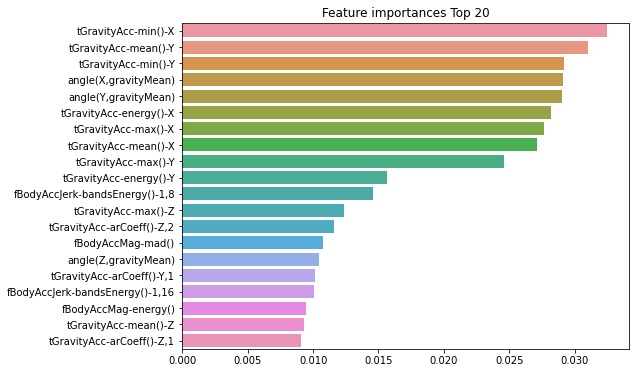

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values=rf_clf1.feature_importances_
ftr_importances=pd.Series(ftr_importances_values,index=X_train.columns)
ftr_top20=ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

**05. GBM(Gradient Boosting Machine)**

[GBM의 개요 및 실습]



In [24]:
from sklearn.ensemble import GradientBoostingClassifier
import time
import warnings
warnings.filterwarnings('ignore')

X_train,X_test,y_train,y_test=get_human_dataset()

#GBM 수행 시간 측정을 위한 시작 시간 설정
start_time=time.time()
gb_clf=GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train,y_train)
gb_pred=gb_clf.predict(X_test)
gb_accuracy=accuracy_score(y_test,gb_pred)

print('GBM 정확도: {0:4f}'.format(gb_accuracy))
print('GBM 수행 시간: {0:.1f} 초'.format(time.time()-start_time))

GBM 정확도: 0.938582
GBM 수행 시간: 882.1 초


[GBM 하이퍼 파라미터 및 튜닝]

In [25]:
from sklearn.model_selection import GridSearchCV

params={'n_estimators':[100,500],'learning_rate':[0.05,0.1]}
grid_cv=GridSearchCV(gb_clf,param_grid=params,cv=2,verbose=1)
grid_cv.fit(X_train,y_train)
print('최적 하이퍼 파라미터:\n',grid_cv.best_params_)
print('최고 예측 정확도: {0:4f}'.format(grid_cv.best_score_))

Fitting 2 folds for each of 4 candidates, totalling 8 fits


KeyboardInterrupt: ignored

In [ ]:
#GridSearchCV를 이용해 최적으로 학습된 estimator로 예측 수행
gb_pred=grid_cv.best_estimator_.predict(X_test)
gb_accuracy=accuracy_score(y_test,gb_pred)
print('GBM 정확도: {0:.4f}'.format(gb_accuracy))